In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib
from scipy import stats
from scipy.stats import norm, skew
matplotlib.rc('figure', figsize = (20, 8))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')
import psycopg2
import csv

In [3]:
orders=pd.read_csv('c:\\Users\\kikot\\Downloads\\Telegram Desktop\\orders.csv')

In [4]:
expenses=pd.read_csv('c:\\Users\\kikot\\OneDrive\Рабочий стол\expenses.csv')

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
C:\Users\kikot\AppData\Local\Temp\ipykernel_8508\1297576758.py:1: SyntaxWarning: invalid escape sequence '\e'
  expenses=pd.read_csv('c:\\Users\\kikot\\OneDrive\Рабочий стол\expenses.csv')


In [5]:
visitation=pd.read_csv('c:\\Users\\kikot\\OneDrive\\Рабочий стол\\visitation.csv')

In [6]:
conn = psycopg2.connect(dbname='data', user='postgres', 
                        password='486252522', host='localhost' , port = '5433')
cursor = conn.cursor()

In [7]:
merged_df = pd.concat([expenses, orders, visitation], axis=1)
merged_df.fillna('no info')

,dt,Channel,costs,User Id,Event Dt,Revenue,User Id,Region,Device,Channel,Session Start,Session End
0,2022-05-01,FaceBoom,113.3,188246423999.0,2022-05-01 23:09:52,4.99,981449118918,Russia,iPhone,organic,2022-05-01 02:36:01,2022-05-01 02:45:01
1,2022-05-02,FaceBoom,78.1,174361394180.0,2022-05-01 12:24:04,4.99,278965908054,Russia,iPhone,organic,2022-05-01 04:46:31,2022-05-01 04:47:35
2,2022-05-03,FaceBoom,85.8,529610067795.0,2022-05-01 11:34:04,4.99,590706206550,Russia,Mac,organic,2022-05-01 14:09:25,2022-05-01 15:32:08
3,2022-05-04,FaceBoom,136.4,319939546352.0,2022-05-01 15:34:40,4.99,326433527971,Russia,Android,TipTop,2022-05-01 00:29:59,2022-05-01 00:54:25
4,2022-05-05,FaceBoom,122.1,366000285810.0,2022-05-01 13:59:51,4.99,349773784594,Russia,Mac,organic,2022-05-01 03:33:35,2022-05-01 03:57:40
...,...,...,...,...,...,...,...,...,...,...,...,...
309896,no info,no info,no info,no info,no info,no info,329994900775,Turkey,PC,LeapBob,2022-10-31 13:28:12,2022-10-31 14:39:29
309897,no info,no info,no info,no info,no info,no info,334903592310,Thailand,PC,lambdaMediaAds,2022-10-31 22:14:52,2022-10-31 22:39:36
309898,no info,no info,no info,no info,no info,no info,540102010126,China,PC,organic,2022-10-31 01:40:48,2022-10-31 01:41:31
309899,no info,no info,no info,no info,no info,no info,308736936846,China,Mac,organic,2022-10-31 07:37:34,2022-10-31 07:37:55


In [8]:
merged_df.to_csv("dash.csv", index=False)

In [9]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd

# Предположим, что у вас есть DataFrame с данными
# Вам нужно будет заменить этот DataFrame на ваш CSV файл
data = pd.read_csv("C:\\Users\\kikot\\OneDrive\\Рабочий стол\\маркетинг\\dash.csv")

# Создание экземпляра Dash приложения
app = dash.Dash(__name__)

# Определение макета дашборда
app.layout = html.Div(children=[
    html.H1(children='Простой дашборд'),

    html.Div(children='''
        Пример дашборда на Python с использованием Plotly Dash.
    '''),

    # График с затратами по каналам
    dcc.Graph(
        id='costs-by-channel',
        figure={
            'data': [
                {'x': data['Channel'], 'y': data['costs'], 'type': 'bar', 'name': 'Затраты'}
            ],
            'layout': {
                'title': 'Затраты по каналам'
            }
        }
    ),

    # Таблица с данными по сессиям
    html.H2(children='Данные по сессиям'),
    html.Table([
        html.Thead(
            html.Tr([html.Th(col) for col in data.columns])
        ),
        html.Tbody([
            html.Tr([
                html.Td(data.iloc[i][col]) for col in data.columns
            ]) for i in range(min(len(data), 10))  # Ограничиваем вывод для примера
        ])
    ])
])

# Запуск сервера приложения
if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\kikot\AppData\Local\Temp\ipykernel_8508\2500448907.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\kikot\AppData\Local\Temp\ipykernel_8508\2500448907.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\kikot\AppData\Local\Temp\ipykernel_8508\2500448907.py:8: DtypeWarning: Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:\\Users\\kikot\\OneDrive\\Рабочий стол\\маркетинг\\dash.csv")


# 2.3 Создание профилей пользователей

смотрю из каких стран приходят пользователи больше всего


In [10]:
data['Region'].value_counts()

Region
Russia      207327
Turkey       36419
Thailand     35396
China        30759
Name: count, dtype: int64

из России приходит наибольшее количество пользователей 

вывожу по каким сайтам пришло больше всего людей

In [11]:
data['Channel'].value_counts()

Channel
FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: count, dtype: int64

могу выдели топ-3 сайта это : 

organic               107760

TipTop                 54794

FaceBoom               49022

смотрю каким девайсом пользуются большинство людей

In [12]:
data['Device'].value_counts()

Device
iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: count, dtype: int64

пользователи больше всего пользуются iPhone

Используя ранее определенную функцию я построил набор данных с профилями
пользователей. Определил:
−
 Из каких стран приходят посетители. Какие страны дают больше всего
платящих пользователей.
−
 Какими устройствами они пользуются. С каких устройств чаще всего
заходят платящие пользователи.
По каким рекламным каналам шло привлечение пользователей. Какие каналы
приносят больше всего платящих пользователей.

# 2.4 Маркетинговый анализ

In [13]:
expenses.head()

,dt,Channel,costs
0,2022-05-01,FaceBoom,113.3
1,2022-05-02,FaceBoom,78.1
2,2022-05-03,FaceBoom,85.8
3,2022-05-04,FaceBoom,136.4
4,2022-05-05,FaceBoom,122.1


вывожу затраты за сайты

In [14]:
channel_costs_report = pd.DataFrame()
channel_costs_report['costs'] = expenses.groupby('Channel')['costs'].sum()
channel_costs_report.sort_values(by='costs', ascending=False)#.style.format({'share': '{:.0f}%', 'payer_share': '{:.2f

,costs
Channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


In [15]:
expenses['costs'].sum().round()

105497.0

105497.0 - Общая сумма расходов на маркетинг 


Больше всего было потрачено на маркетинг в каналах TipTop и FaceBoom. На них приходится больше 80% всех затрат.

In [16]:
!pip install matplotlib

In [17]:
from matplotlib import pyplot as plt

визуализирую затраты 

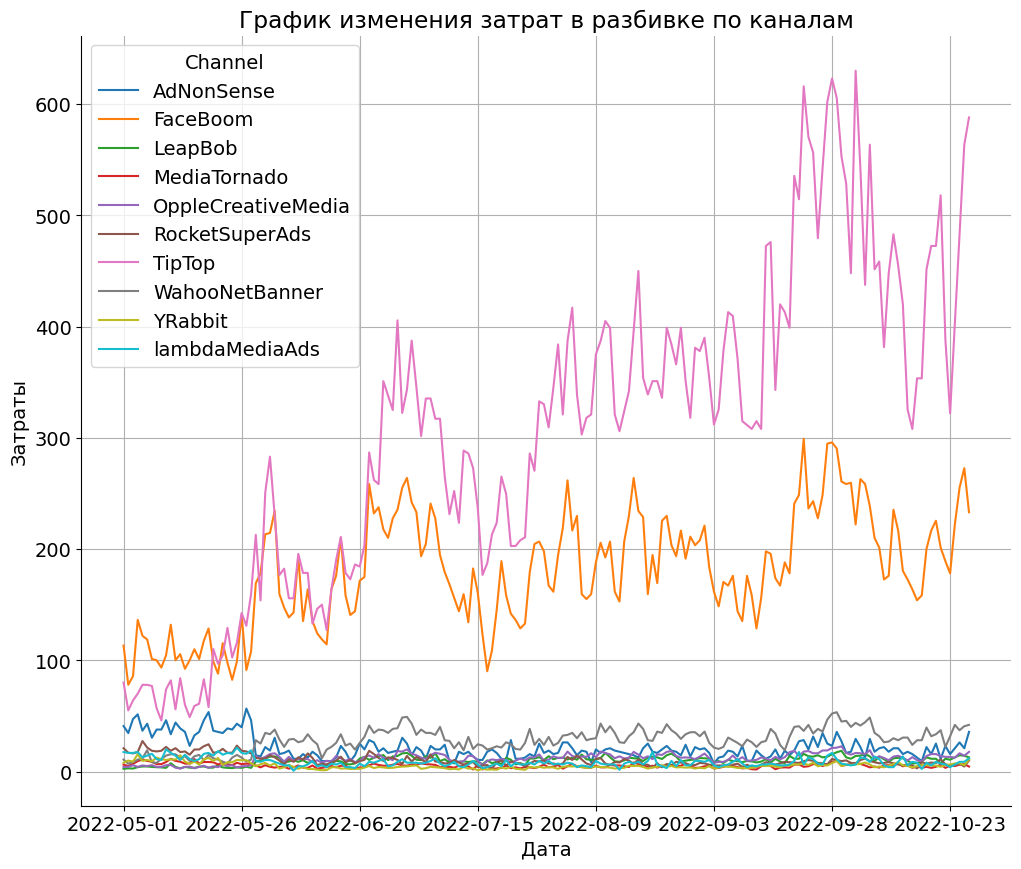

In [18]:
filtered_data = expenses.pivot_table(
        index='dt', columns='Channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(12, 10),
           grid=True,)

plt.title('График изменения затрат в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Можно сделать вывод, что затраты на маркетинг со временем возрастали только на двух каналах: TipTop и FaceBoom

In [19]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

в ходе этого модуля я определил сколько денег потратили вообщем  и визуализировал затраты сайта 